<a href="https://colab.research.google.com/github/MEugeniaLuna/StressLevel/blob/main/EntregaFinal_PrediccionStress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinstalación de Pandas para poder hace profiling

In [2]:
#!pip uninstall pandas
#!pip install "pandas==1.1.03"
#%pylab inline


Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 13.9 MB/s 
Populating the interactive namespace from numpy and matplotlib


In [3]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 21.9 MB 139 kB/s
     |████████████████████████████████| 102 kB 20.4 MB/s 
     |████████████████████████████████| 690 kB 37.1 MB/s 
     |████████████████████████████████| 4.7 MB 31.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 33.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=bf1d6c6173b7a012131748a70f9ddde459db7db082c252e3101d01d57a32ee11
  Stored in directory: /tmp/pip-ephem-wheel-cache-7kbem7nf/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a07fa90604ef810c0ed102d9023829702a37468fda8696b99d3ee18e969a21de
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehas

# Presentación del dataset: Predicción del nivel de stress

En el estilo de vida actual, las personas solemos olvidar los beneficios que el sueño y el dormir generan en el cuerpo humano. La propuesta de Smart-Yoga Pillow (SaYoPillow) es entender la relación entre el sueño y el stress, para materializar la idea del "sueño inteligente" a través de este dispositivo.
Se propone combinar un procesador dentro de la almohada, asociado a un modelo analítico, con hábitos de sueño saludables.
La almohada percibe los cambios e indicadores durante la etapa de sueño y en base a ellos, el modelo busca predecir los niveles de stress del día siguiente.
El objetivo final es promover hábitos de sueño y un estilo de vida saludables para reducir los niveles de stress.

## Importación de librería.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Acquisition

In [8]:
# leemos el dataset
df = pd.read_csv('/content/drive/MyDrive/DataScience/PF/Stress/SaYoPillow.csv')
df.head()


sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0

## Data Wrangling

In [9]:
# Renombramos las columnas para entender mejor
df.rename(columns = {'sr':'snoring_rate', 'rr':'respiration_rate',
                        't':'body_temperature', 'lm':'limb_movement', 
                        'bo':'blood_oxygen', 'rem':'eye_movement', 
                        'sr.1':'sleeping_hours','hr':'heart_rate', 
                        'sl':'stress_level'}, inplace = True)
df.head()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
0        89.840         99.60           1.840       74.20             3  
1        89.552         98.88           1.552       72.76             3  
2        95.000         85.00           7.000       60.00             1  
3        88.768         96.92           0.768       68.84             3  
4        96.248         72.48           8.248       53.12             0

# EDA

In [10]:
# Vemos las dimensiones del data set
df.shape

(630, 9)

In [11]:
# Tipos de datos
df.dtypes


snoring_rate        float64
respiration_rate    float64
body_temperature    float64
limb_movement       float64
blood_oxygen        float64
eye_movement        float64
sleeping_hours      float64
heart_rate          float64
stress_level          int64
dtype: object

In [12]:
# Totalidad de registros por columnas
df.count()

snoring_rate        630
respiration_rate    630
body_temperature    630
limb_movement       630
blood_oxygen        630
eye_movement        630
sleeping_hours      630
heart_rate          630
stress_level        630
dtype: int64

In [13]:
# Vemos un poco mas de informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [14]:
# Principales Estadisticos
df.describe().T

count  mean        std   min    25%   50%    75%    max
snoring_rate      630.0  71.6  19.372833  45.0  52.50  70.0  91.25  100.0
respiration_rate  630.0  21.8   3.966111  16.0  18.50  21.0  25.00   30.0
body_temperature  630.0  92.8   3.529690  85.0  90.50  93.0  95.50   99.0
limb_movement     630.0  11.7   4.299629   4.0   8.50  11.0  15.75   19.0
blood_oxygen      630.0  90.9   3.902483  82.0  88.50  91.0  94.25   97.0
eye_movement      630.0  88.5  11.893747  60.0  81.25  90.0  98.75  105.0
sleeping_hours    630.0   3.7   3.054572   0.0   0.50   3.5   6.50    9.0
heart_rate        630.0  64.5   9.915277  50.0  56.25  62.5  72.50   85.0
stress_level      630.0   2.0   1.415337   0.0   1.00   2.0   3.00    4.0

# Análisis univariado 

**Variable: Movimiento ocular (eye_movement)**

Gráfico Boxplot

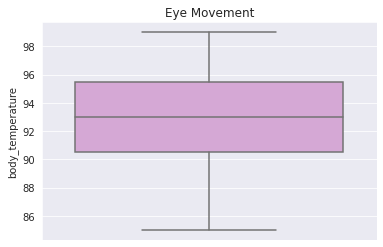

In [15]:
from seaborn import boxplot
ax=sns.boxplot(y=df.body_temperature, data=df.eye_movement, color='plum')
sns.set(style="darkgrid")
ax.set_title('Eye Movement')
plt.show()

Conclusiones: No se observan valores atípicos

Gráfico Histograma

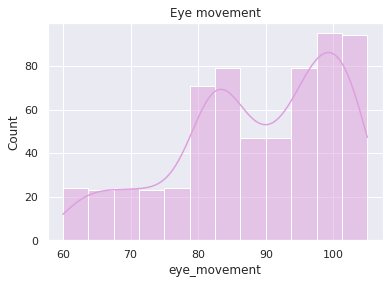

In [16]:
ax=sns.histplot(x='eye_movement', data= df,  kde=True, color='plum')
sns.set(style="darkgrid")
ax.set_title('Eye movement')
plt.show()

Gráfico Violinplot

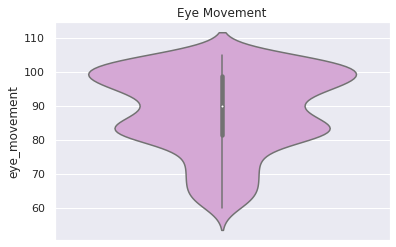

In [17]:
from seaborn import violinplot
ax=sns.violinplot(y=df.eye_movement, orient='v', color='plum')
sns.set(style="darkgrid")
ax.set_title('Eye Movement')
plt.show()

**Variable: Horas de Sueño (sleeping_hours)**

Gráfico Boxplot

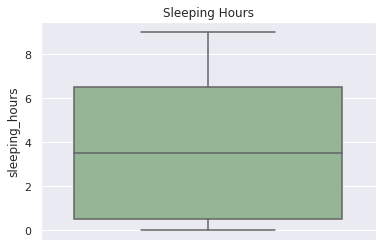

In [18]:
ax=sns.boxplot(y=df.sleeping_hours, data=df.sleeping_hours, color='darkseagreen')
sns.set(style="darkgrid")
ax.set_title('Sleeping Hours')
plt.show()

Conclusiones: No se observan valores atípicos

Gráfico Histograma

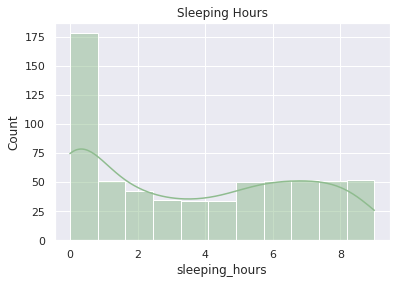

In [19]:
ax=sns.histplot(x='sleeping_hours', data= df,  kde=True, color='darkseagreen')
sns.set(style="darkgrid")
ax.set_title('Sleeping Hours')
plt.show()

Gráfico Violinplot

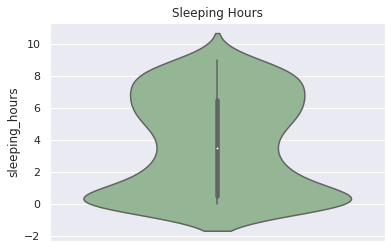

In [20]:
ax=sns.violinplot(y=df.sleeping_hours, orient='v', color='darkseagreen')
sns.set(style="darkgrid")
ax.set_title('Sleeping Hours')
plt.show()

**Variable: Ritmo Cardíaco (heart_rate)**

Gráfico Boxplot

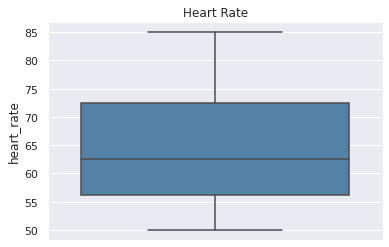

In [21]:
ax=sns.boxplot(y=df.heart_rate, data=df.heart_rate, color='steelblue')
sns.set(style="darkgrid")
ax.set_title('Heart Rate')
plt.show()

Gráfico Histograma

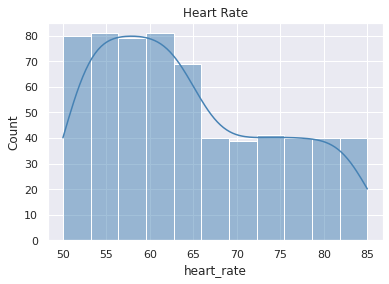

In [22]:
ax=sns.histplot(x='heart_rate', data= df,  kde=True, color='steelblue')
sns.set(style="darkgrid")
ax.set_title('Heart Rate')
plt.show()

Gráfico Violinplot

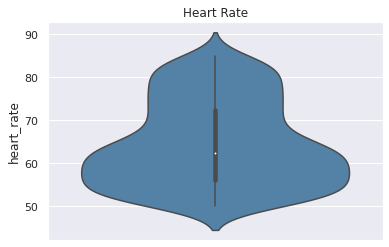

In [23]:
ax=sns.violinplot(y=df.heart_rate, orient='v', color='steelblue')
sns.set(style="darkgrid")
ax.set_title('Heart Rate')
plt.show()

## Distribucion de Frecuencias - Ejemplo : Eye_Movement

In [24]:
def get_freqs(df, column):
    # value_counts de column
    frec_df = df[column].value_counts().sort_index().to_frame()
    #Asignamos el nombre Frec_abs a la columna
    frec_df.rename(columns={column:'Frec_abs'},inplace=True)
    #LLamar a la función .cumsum()
    frec_df["frec_abs_acum"]=frec_df['Frec_abs'].cumsum()
    #Calculamos la Frecuencia Relativa en %
    frec_df["frec_rel_%"] = frec_df["Frec_abs"]/sum(frec_df['Frec_abs'])
    #Es recomendable dejar los porcentajes en base 1. Si es para una visualización, conviene hacer el *100 ahi
    #Y volves a hacer lo mismo
    frec_df["frec_rel_%_acum"] = frec_df["frec_rel_%"].cumsum()
    return frec_df


get_freqs(df, "eye_movement")

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
60.00          1              1    0.001587         0.001587
60.16          1              2    0.001587         0.003175
60.32          1              3    0.001587         0.004762
60.48          1              4    0.001587         0.006349
60.64          1              5    0.001587         0.007937
...          ...            ...         ...              ...
104.84         1            626    0.001587         0.993651
104.88         1            627    0.001587         0.995238
104.92         1            628    0.001587         0.996825
104.96         1            629    0.001587         0.998413
105.00         1            630    0.001587         1.000000

[626 rows x 4 columns]

#Data Profiling


In [25]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

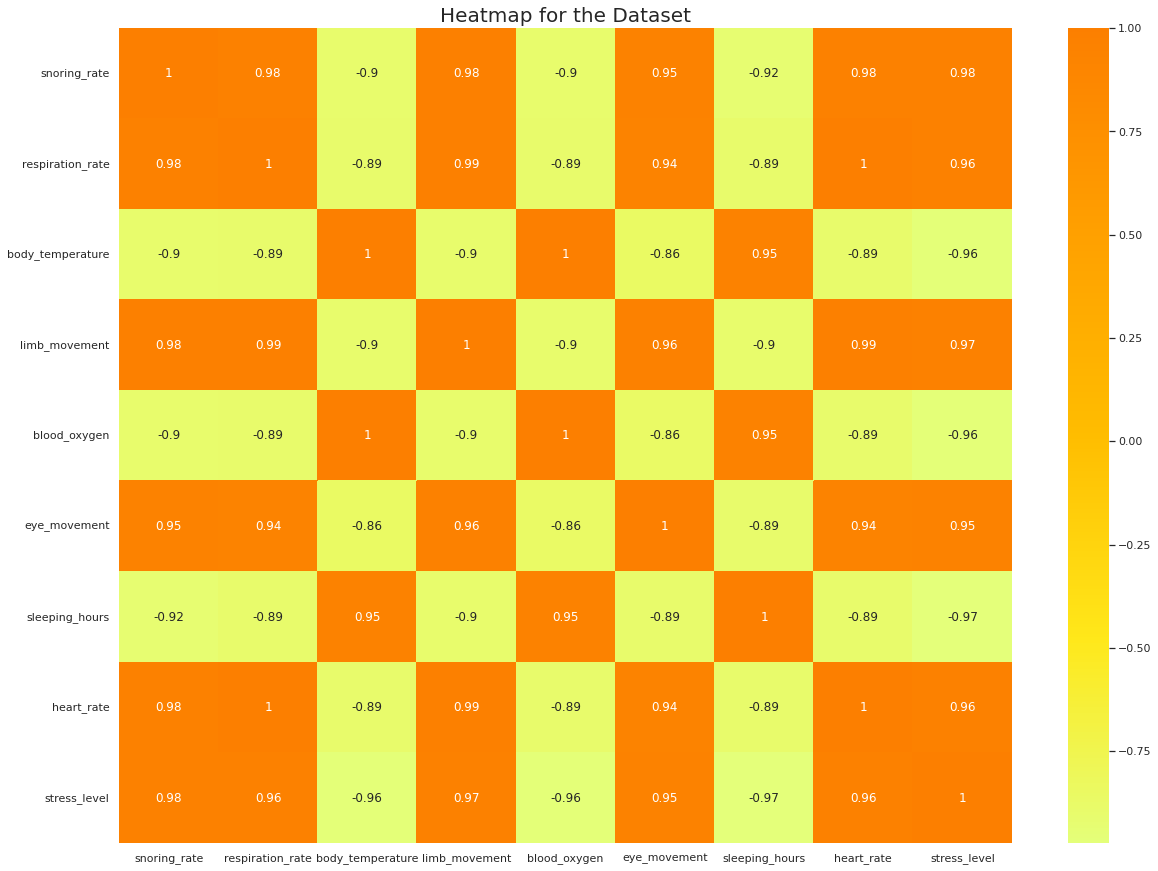

In [26]:
# Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# Análisis bivariado

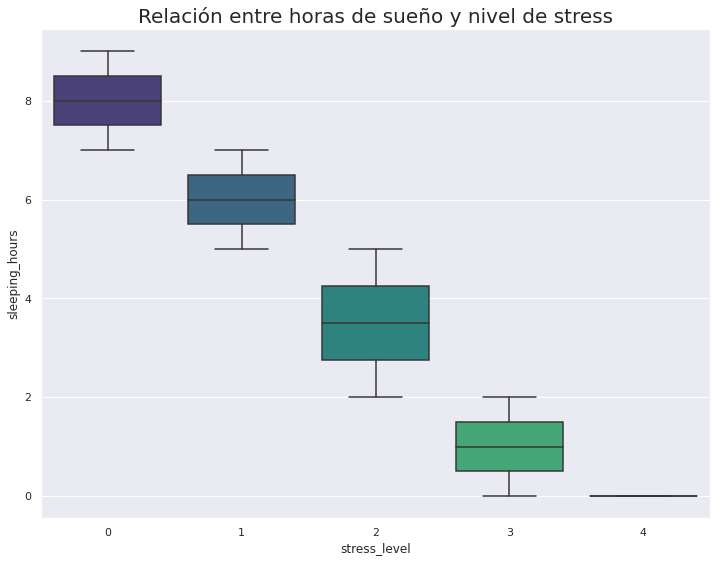

In [27]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x='stress_level', y='sleeping_hours', data=df, palette = 'viridis')
plt.title('Relación entre horas de sueño y nivel de stress', fontsize = 20)
plt.show()

Relación entre la horas de sueño y el nivel de estrés, el grafico muestra que hay una fuerte tendencia negativa cuando disminuyen las horas de sueño mayor es la probabilidades de sufrir altos niveles de estrés. 

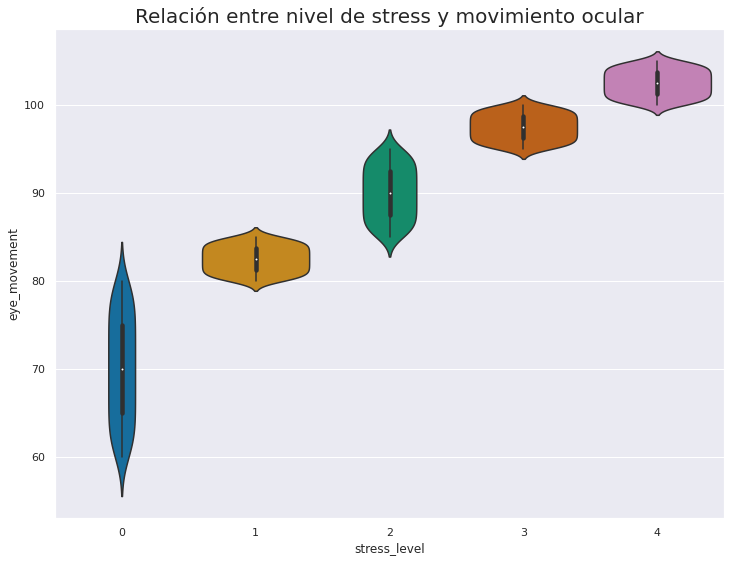

In [28]:
# stress & eye_movement
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x='stress_level', y='eye_movement', data=df, palette = 'colorblind')
plt.title('Relación entre nivel de stress y movimiento ocular', fontsize = 20, fontweight = 30)
plt.show()

El gráfico bivariado anterior sugiere que el aumento del movimiento ocular mientras se duerme produce un incremento en los niveles de stress

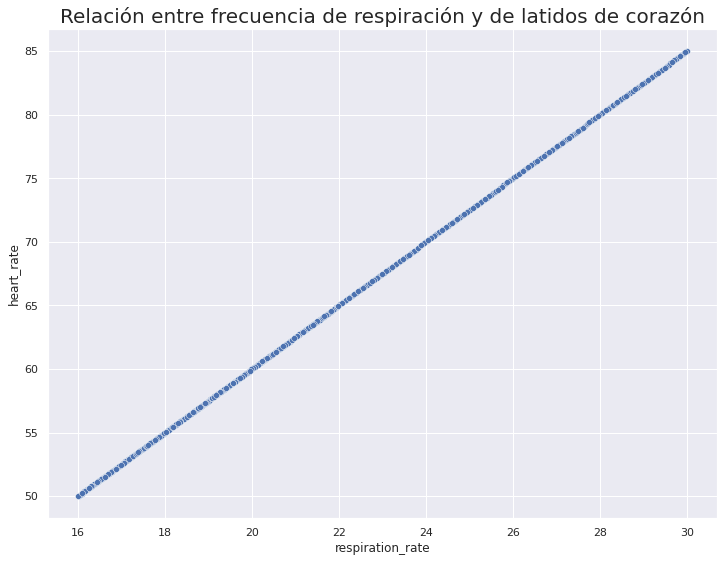

In [29]:
# Respiration_rate vs heart_rate
sns.scatterplot(x="respiration_rate", y="heart_rate", data=df)
plt.title('Relación entre frecuencia de respiración y de latidos de corazón', fontsize = 20, fontweight = 30)
plt.show()

Efectivamente se observa una relación positiva entre la frecuencia de respiración y los latidos del corazón, esto significa que a mayor frecuencia de respiración también se ven incrementados los latidos del corazón.


# Análisis multivariado

Para poder realizar el análisis multivariado, reemplazamos los valores de la variable 'stress_level' para que se transforme en variable categórica


In [30]:
df_categorizado = df.copy()
df_categorizado.stress_level.replace({0: 'low/normal', 1:'medium low', 2: 'medium', 3:'medium high', 4: 'high'}, inplace = True)
df_categorizado.head()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate stress_level  
0        89.840         99.60           1.840       74.20  medium high  
1        89.552         98.88           1.552       72.76  medium high  
2        95.000         85.00           7.000       60.00   medium low  
3        88.768         96.92           0.768       68.84  medium high  
4        96.248         72.48           8.248       53.12   low/normal

<Figure size 1440x1080 with 0 Axes>

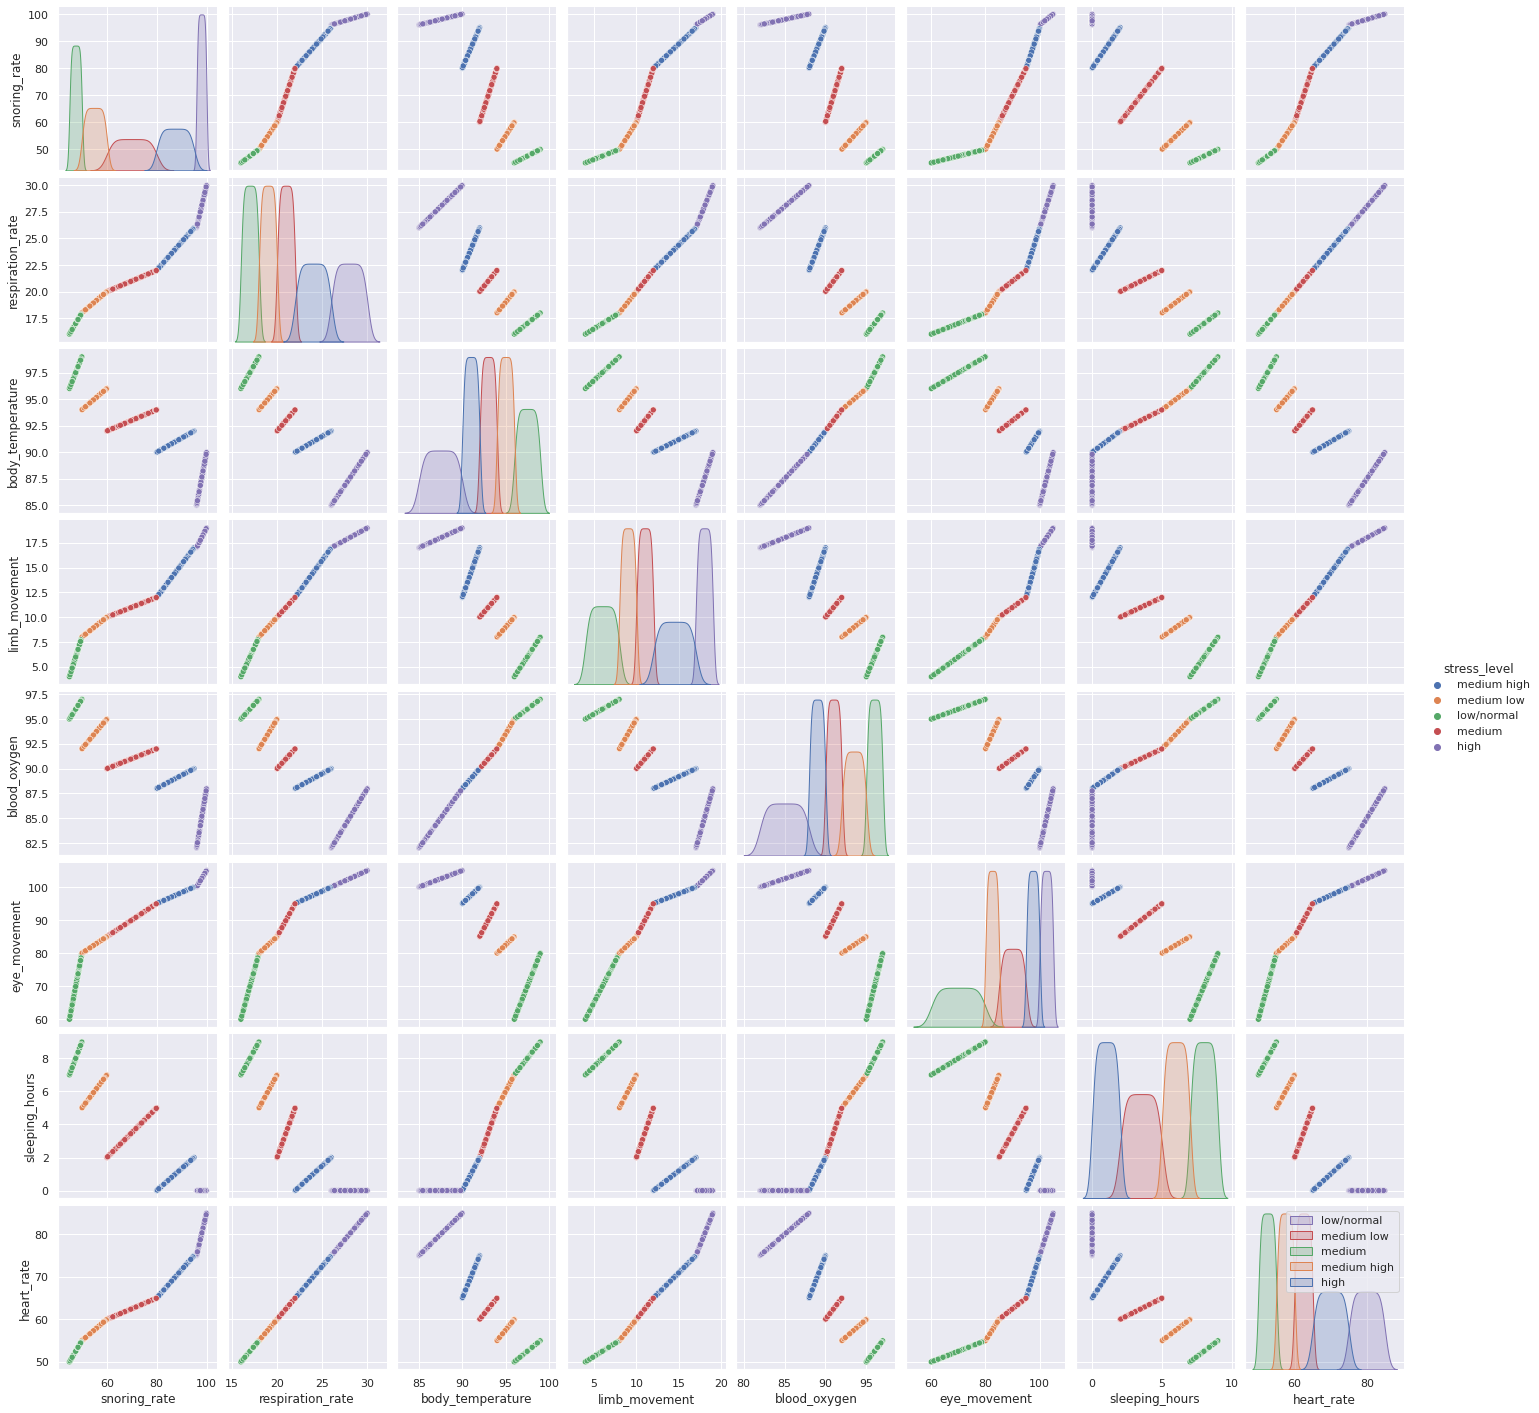

In [31]:
# Pairplot: para poder visualizar todas las variables contra todas

plt.figure(dpi=120) 
sns.pairplot(df_categorizado,hue = 'stress_level')
plt.legend(labels=['low/normal', 'medium low', 'medium', 'medium high', 'high'])
plt.show()

En todos los casos encontramos clusters bien definidos para cada nivel de stress.

**Comparamos las variables movimiento ocular y respiración**

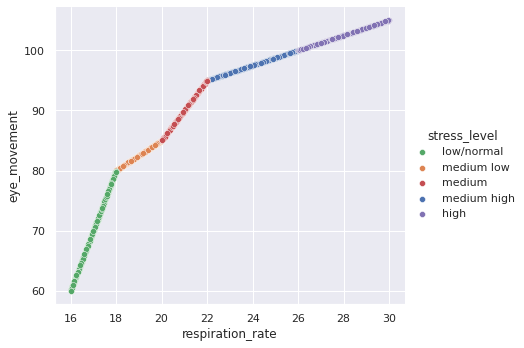

In [32]:
# para ordenar
labels=['low/normal', 'medium low', 'medium', 'medium high', 'high']

g = sns.FacetGrid(df_categorizado, hue='stress_level', height = 5, aspect =1.2)
g.map(sns.scatterplot, 'respiration_rate', 'eye_movement').add_legend(label_order=labels)  
plt.show()

A mayor ritmo respiratorio, mayor movimiento ocular. Para cada nivel de stress se identifican claramente los valores de respiración y movimiento ocular.

**Comparamos las variables horas de sueño y movimiento de los miembros**

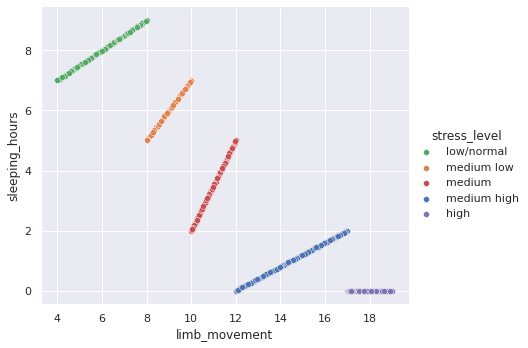

In [33]:
g1 = sns.FacetGrid(df_categorizado, hue='stress_level', height = 5, aspect =1.2)
g1.map(sns.scatterplot, 'limb_movement', 'sleeping_hours').add_legend(label_order=labels)  
plt.show()

Se observan clusters bien definidos en la relación entre movimiento de los miembros y horas de sueño, en función del nivel de stress.
La correlación entre ambas variables es directa.

**Comparamos las variables ronquidos y latidos del corazón**

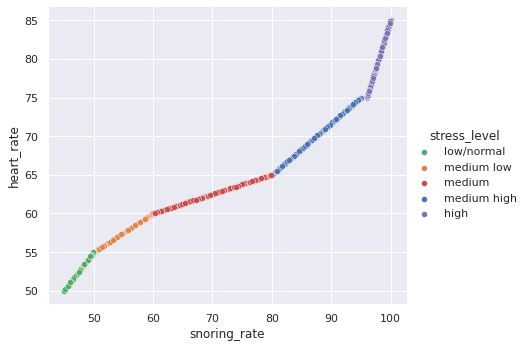

In [34]:
g3 = sns.FacetGrid(df_categorizado, hue='stress_level', height = 5, aspect =1.2)
g3.map(sns.scatterplot, 'snoring_rate', 'heart_rate').add_legend(label_order=labels)  
plt.show()

Se observa una relación directa entre los latidos del corazón y el nivel de ronquidos: a mayor cantidad de ronquidos, más rápido late el corazón y se traduce en un nivel de stress más elevado

# Análisis de correlaciones

In [35]:
# Correlaciones
df.corr()

snoring_rate  respiration_rate  body_temperature  \
snoring_rate          1.000000          0.976268         -0.902475   
respiration_rate      0.976268          1.000000         -0.889237   
body_temperature     -0.902475         -0.889237          1.000000   
limb_movement         0.981078          0.991738         -0.896412   
blood_oxygen         -0.903140         -0.889210          0.998108   
eye_movement          0.950600          0.935572         -0.857299   
sleeping_hours       -0.920554         -0.891855          0.954860   
heart_rate            0.976268          1.000000         -0.889237   
stress_level          0.975322          0.963516         -0.962354   

                  limb_movement  blood_oxygen  eye_movement  sleeping_hours  \
snoring_rate           0.981078     -0.903140      0.950600       -0.920554   
respiration_rate       0.991738     -0.889210      0.935572       -0.891855   
body_temperature      -0.896412      0.998108     -0.857299        0.954860   
limb_movement          1.000000     -0.898527      0.964703       -0.901102   
blood_oxygen          -0.898527      1.000000     -0.862136        0.950189   
eye_movement           0.964703     -0.862136      1.000000       -0.893952   
sleeping_hours        -0.901102      0.950189     -0.893952        1.000000   
heart_rate             0.991738     -0.889210      0.935572       -0.891855   
stress_level           0.971071     -0.961092      0.951988       -0.973036   

                  heart_rate  stress_level  
snoring_rate        0.976268      0.975322  
respiration_rate    1.000000      0.963516  
body_temperature   -0.889237     -0.962354  
limb_movement       0.991738      0.971071  
blood_oxygen       -0.889210     -0.961092  
eye_movement        0.935572      0.951988  
sleeping_hours     -0.891855     -0.973036  
heart_rate          1.000000      0.963516  
stress_level        0.963516      1.000000

In [36]:
np.ones_like(df.corr(), dtype=bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [37]:
upper_tri = np.triu(np.ones_like(df.corr(), dtype=bool)) #solo a la triangular superior le asigna valores verdaderos
upper_tri


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

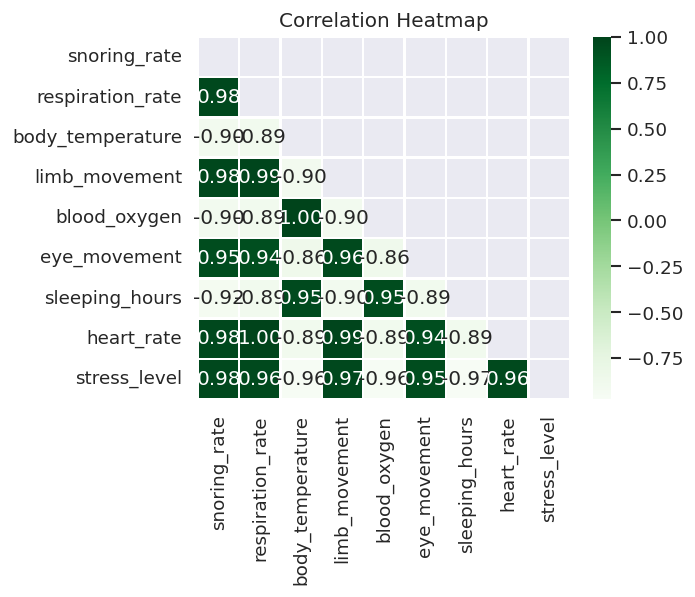

In [38]:
# Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
# mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = upper_tri, fmt = ".2f",annot=True,lw=1, cmap = 'Greens') 
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()
plt.show()

Este gráfico nos permite observar la correlación con nuestra variable target que es "Stress_level", pudiendo divisar una alta correlación con las variables "snoring_rate", "limb_movement", "eye_movemente" y "heart_rate"


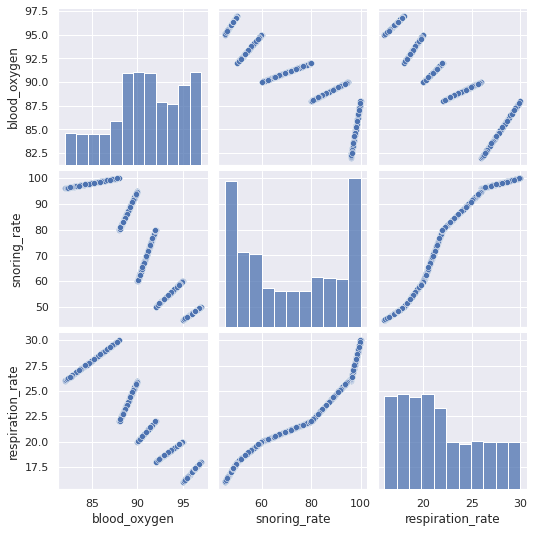

In [39]:
sns.pairplot(df[['blood_oxygen', 'snoring_rate', 'respiration_rate']])

Joint plot de sleeping_hours con otras variables ==> 

Correlacion entre sleeping_hours y snoring_rate ==>  -0.9205544679254017


<Figure size 500x400 with 0 Axes>

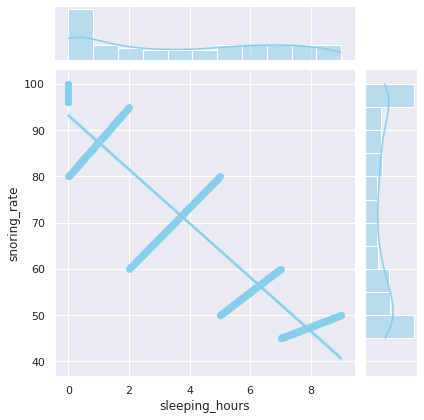

Correlacion entre sleeping_hours y respiration_rate ==>  -0.8918548091540991


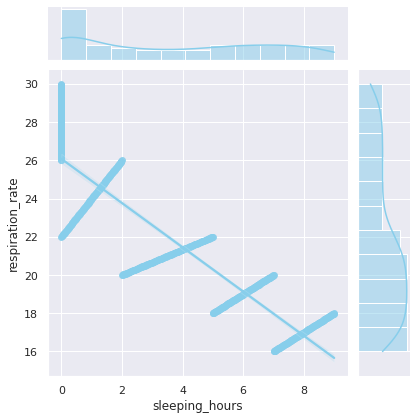

Correlacion entre sleeping_hours y body_temperature ==>  0.9548602096525779


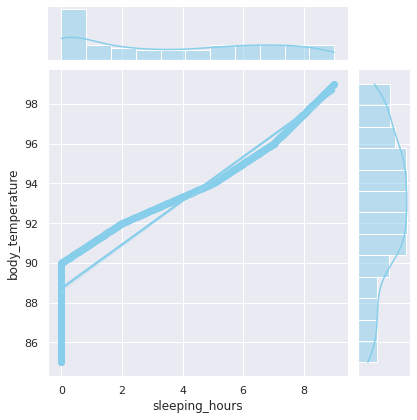

Correlacion entre sleeping_hours y limb_movement ==>  -0.901102343461225


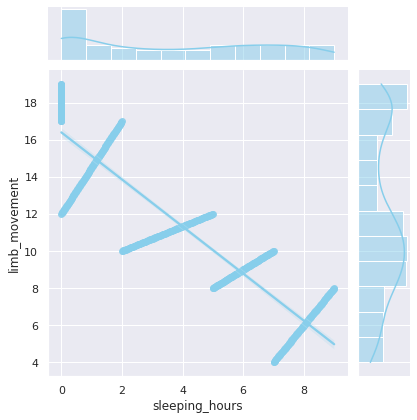

Correlacion entre sleeping_hours y blood_oxygen ==>  0.9501888249731548


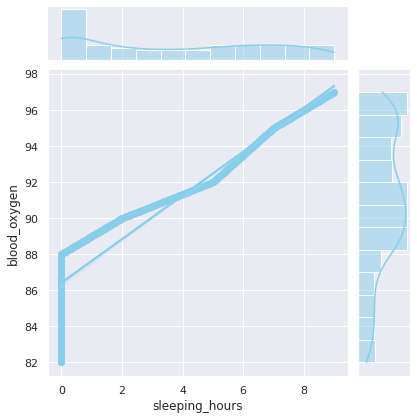

Correlacion entre sleeping_hours y eye_movement ==>  -0.893952066509092


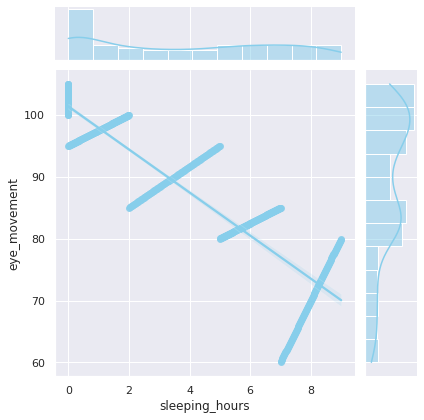

Correlacion entre sleeping_hours y heart_rate ==>  -0.8918548091540992


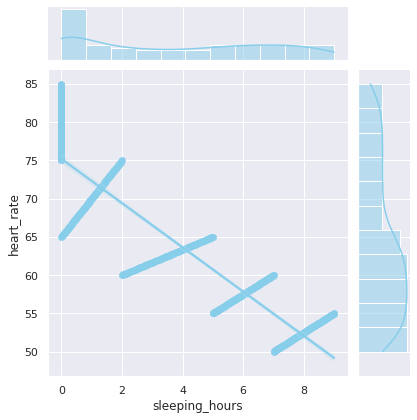

In [40]:
# Creamos el join plot entre sleeping_hours y el resto de las variables 

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de sleeping_hours con otras variables ==> \n")
for i in  df.columns:
    if i != 'sleeping_hours' and i != 'stress_level':
        print(f"Correlacion entre sleeping_hours y {i} ==> ",df.corr().loc['sleeping_hours'][i])
        sns.jointplot(x='sleeping_hours', y=i, data=df, kind = 'reg', color = 'skyblue')
        plt.show()

#Dataset Definitivo

Eliminamos las columnas "Respiration Rate" y "Body Temperature" porque tienen una correlación de 1 con las columnas "Heart Rate" y "Blood Oxygen" respectivamente.

In [41]:
df_definitivo = df.drop(['respiration_rate','body_temperature'], axis=1)
df_definitivo.head()

snoring_rate  limb_movement  blood_oxygen  eye_movement  sleeping_hours  \
0         93.80         16.600        89.840         99.60           1.840   
1         91.64         15.880        89.552         98.88           1.552   
2         60.00         10.000        95.000         85.00           7.000   
3         85.76         13.920        88.768         96.92           0.768   
4         48.12          6.496        96.248         72.48           8.248   

   heart_rate  stress_level  
0       74.20             3  
1       72.76             3  
2       60.00             1  
3       68.84             3  
4       53.12             0

#Modelos de Clasificación

#Árbol de decisión

In [42]:
# Separamos en X e y
X = df_definitivo.drop("stress_level", axis=1) # Elimino de mi dataset la variable a predecir
y = df_definitivo.stress_level # Defino el Target

In [43]:
# Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

# Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [44]:
from sklearn.tree import DecisionTreeClassifier # Importamos el modelo y definimos un nivel de profundidad de 2
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) 

In [45]:
# Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [46]:
y_train_pred = tree.predict(X_train) # Prediccion en Train
y_test_pred = tree.predict(X_test) # Prediccion en Test

In [47]:
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6099773242630385
% de aciertos sobre el set de evaluación: 0.5714285714285714


In [48]:
# Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 0 39  0  0  0]
 [ 0 36  0  0  0]
 [ 0 40  0  1  0]
 [ 0  0  0 37  0]
 [ 0  0  0  1 35]]


In [49]:
print(classification_report(y_test, y_test_pred))
# Acá el classification report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.31      1.00      0.48        36
           2       0.00      0.00      0.00        41
           3       0.95      1.00      0.97        37
           4       1.00      0.97      0.99        36

    accuracy                           0.57       189
   macro avg       0.45      0.59      0.49       189
weighted avg       0.44      0.57      0.47       189



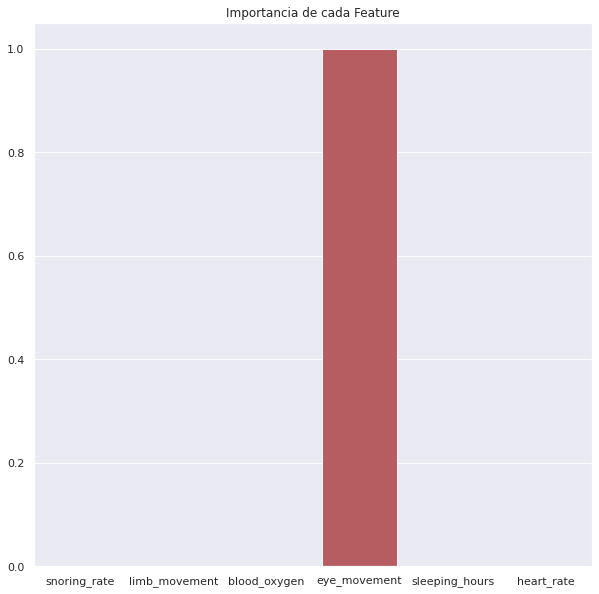

In [50]:
# Importancia de las variables Graficamos 
plt.figure(figsize=(10,10))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Por lo que vemos, el modelo sólo está considerando la variable eye_movement e ignorando el resto. No parece ser un buen modelo para estos datos.

# Grid Search with Cross Validation

In [51]:
# importamos
from sklearn.model_selection import GridSearchCV


In [52]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [53]:
# Creamos la variable parámetro, para probar cambiando el nivel de profundidad entre 1 y 7
params = {'max_depth': np.arange(1,7)}

In [54]:
features = df_definitivo.drop("stress_level", axis=1).values
features

array([[ 93.8  ,  16.6  ,  89.84 ,  99.6  ,   1.84 ,  74.2  ],
       [ 91.64 ,  15.88 ,  89.552,  98.88 ,   1.552,  72.76 ],
       [ 60.   ,  10.   ,  95.   ,  85.   ,   7.   ,  60.   ],
       ...,
       [ 97.504,  17.752,  84.256, 101.88 ,   0.   ,  78.76 ],
       [ 58.64 ,   9.728,  94.592,  84.32 ,   6.728,  59.32 ],
       [ 73.92 ,  11.392,  91.392,  91.96 ,   4.088,  63.48 ]])

In [55]:
target = df_definitivo[['stress_level']].values.ravel()
target

array([3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 0, 4, 3, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 1, 3, 2, 0, 4, 0, 4, 2, 3, 0, 4, 0, 4, 2, 2, 2, 0,
       2, 4, 2, 4, 1, 4, 0, 1, 3, 0, 1, 2, 4, 3, 3, 1, 4, 3, 0, 2, 4, 1,
       0, 2, 4, 0, 1, 4, 1, 0, 0, 4, 4, 1, 3, 4, 1, 1, 1, 4, 2, 1, 1, 1,
       3, 4, 2, 3, 2, 4, 0, 2, 4, 2, 2, 3, 4, 4, 0, 4, 1, 2, 2, 2, 4, 1,
       2, 4, 0, 3, 2, 4, 2, 2, 0, 1, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 0,
       4, 3, 1, 0, 0, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 4, 4,
       0, 2, 3, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 0, 4, 4, 1, 2, 2, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 4, 0, 0, 0,
       2, 3, 0, 0, 0, 2, 4, 0, 2, 4, 1, 1, 1, 3, 0, 0, 3, 3, 0, 2, 2, 2,
       1, 4, 0, 1, 3, 4, 2, 1, 4, 0, 3, 4, 1, 3, 0, 0, 3, 4, 3, 1, 4, 3,
       3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 0,
       0, 1, 2, 3, 2, 2, 4, 4, 1, 0, 4, 1, 2, 3, 4, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 3, 2, 4, 0, 4, 0, 4, 0, 2, 1, 2, 1, 3,

In [56]:
tree_cv = GridSearchCV(tree, param_grid=params, cv=5)

In [57]:
tree_cv.fit(features, target)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6])})

In [58]:
new_tree = tree_cv.best_estimator_
new_tree

DecisionTreeClassifier(max_depth=4, random_state=42)

Según la validación cruzada, el nivel de profundidad óptimo para el modelo, es 4.

# Árbol de decisión mejorado

In [59]:
# Entrenamos el nuevo modelo
new_tree.fit(X_train,y_train)

y_train_pred_new= new_tree.predict(X_train)
y_test_pred_new= new_tree.predict(X_test)
confusion_matrix(y_test, y_test_pred_new)

array([[39,  0,  0,  0,  0],
       [ 1, 34,  1,  0,  0],
       [ 0,  0, 40,  1,  0],
       [ 0,  0,  0, 37,  0],
       [ 0,  0,  0,  1, 35]])

In [60]:
# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred_new)

# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred_new)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.9788359788359788


In [61]:
print(classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        36
           2       0.98      0.98      0.98        41
           3       0.95      1.00      0.97        37
           4       1.00      0.97      0.99        36

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



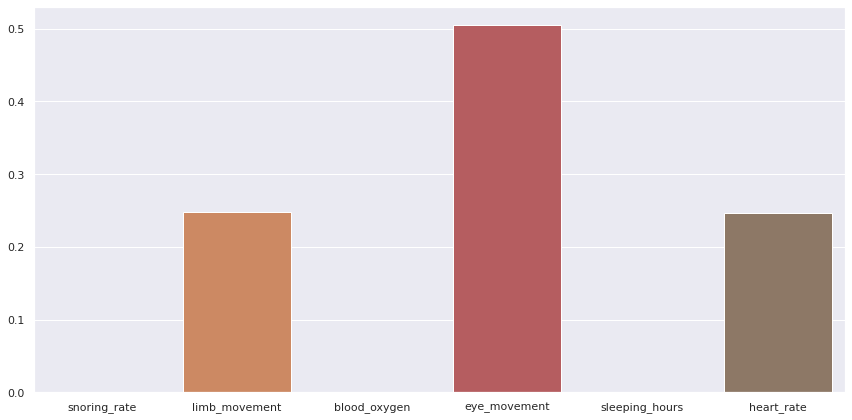

In [62]:
# Importancia de las variables
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(X_train.columns, new_tree.feature_importances_)
fig.tight_layout()
plt.show()



Con esta variante (cambiar el max_depth a 4), el modelo considera tres variables. Parece una mejor opción, en caso de elegir el algoritmo de árbol de decisión.

#Vecinos más cercanos

In [63]:
# Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier


In [64]:
# Creamos el modelo
knn = KNeighborsClassifier()

In [65]:
# Separamos el dataset, aislando la variable a predecir 
X = df_definitivo.drop("stress_level", axis=1)
y = df_definitivo[['stress_level']]
y.head()

stress_level
0             3
1             3
2             1
3             3
4             0

In [66]:
# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 27)

In [67]:
# Hacemos una transformación y entrenamos el modelo
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [68]:
# Predecimos con los datos de entrenamiento
KNN_train_prediction = knn.predict(X_train)


In [69]:
# Predecimos con nuestro dataset de prueba
KNN_prediction = knn.predict(X_test)
KNN_prediction

array([0, 4, 3, 4, 0, 0, 2, 2, 2, 4, 0, 4, 3, 3, 1, 3, 0, 1, 0, 3, 3, 0,
       3, 1, 3, 1, 3, 3, 3, 0, 0, 0, 4, 1, 2, 3, 1, 4, 4, 3, 1, 3, 1, 1,
       2, 3, 4, 4, 1, 2, 3, 4, 2, 1, 1, 4, 3, 1, 2, 1, 0, 4, 0, 1, 4, 2,
       0, 1, 4, 4, 0, 2, 1, 3, 3, 4, 1, 2, 4, 2, 4, 0, 3, 4, 3, 3, 4, 2,
       0, 2, 2, 1, 4, 2, 0, 1, 4, 1, 4, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 2,
       2, 4, 1, 2, 1, 3, 0, 2, 0, 2, 1, 0, 3, 4, 2, 2])

In [70]:
# Calculamos la accuracy en el entrenamiento
print(accuracy_score(y_train,KNN_train_prediction))


1.0


In [71]:
# Vemos la precisión del modelo

print(accuracy_score(y_test,KNN_prediction))


1.0


In [72]:
# Classification Report
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [73]:
# Creamos la matriz de confusión para verificar la precisión
matriz = confusion_matrix(y_test, KNN_prediction)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[25  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


## Optimizacion con GridSearch

In [74]:
params = {'n_neighbors': np.arange(1,7), 'weights': ['uniform', 'distance']}
params

{'n_neighbors': array([1, 2, 3, 4, 5, 6]), 'weights': ['uniform', 'distance']}

In [75]:
features = df_definitivo.drop("stress_level", axis=1).values
target = df_definitivo[['stress_level']].values.ravel()


In [76]:
knn_cv = GridSearchCV(knn, param_grid=params, cv=5)

In [77]:
knn_cv.fit(features, target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6]),
                         'weights': ['uniform', 'distance']})

In [78]:
knn_best=knn_cv.best_estimator_

## Vecinos más cercanos (mejorado)

In [79]:
knn_best.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [80]:
KNN_prediction_best = knn_best.predict(X_test)

In [81]:
# Vemos la precisión del modelo

print(accuracy_score(y_test,KNN_prediction_best))

1.0


In [82]:
# Classification Report
print(classification_report(y_test, KNN_prediction_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Conclusiones
El modelo está demasiado "perfecto". El accuracy, precision y recall de 1 parece ser overfitting.

# Random Forest

## Random Forest sencillo

In [83]:
# Carga de las librerías
import urllib.request
from sklearn.ensemble import RandomForestClassifier


In [84]:
# Separamos en X e y
X = df_definitivo.drop(["stress_level"], axis=1) # Eliminamos la variable a predecir
y = df_definitivo.stress_level # Definimos el Target

In [85]:
# Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [86]:
# Creamos un arbol de decisión sencillo con los parámetros de GridSearch y lo fiteamos
tree = DecisionTreeClassifier(max_depth=4,random_state=11) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=11)

In [87]:
y_test_pred = tree.predict(X_test) #Predicción en Test

In [88]:
# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9841269841269841


In [89]:
# Creamos un random forest!
model = RandomForestClassifier(random_state=11,
                               class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=11)

In [90]:
y_test_pred = model.predict(X_test) # Prediccion en Test

In [91]:
# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9947089947089947


In [92]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.99        38
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



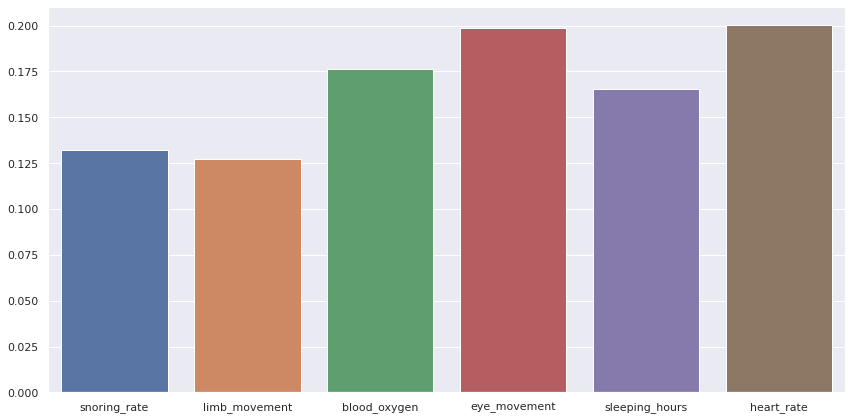

In [93]:
# Importancia de las variables
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(X_train.columns, model.feature_importances_)
fig.tight_layout()
plt.show()

## Aplicamos GridSearch para optimizar el modelo

In [94]:
params = {'max_depth': np.arange(1,7), 'max_features': ['sqrt','log2'] , 'n_estimators':[100,200,300]}
params


{'max_depth': array([1, 2, 3, 4, 5, 6]),
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [100, 200, 300]}

In [95]:
features = df_definitivo.drop("stress_level", axis=1).values
features

array([[ 93.8  ,  16.6  ,  89.84 ,  99.6  ,   1.84 ,  74.2  ],
       [ 91.64 ,  15.88 ,  89.552,  98.88 ,   1.552,  72.76 ],
       [ 60.   ,  10.   ,  95.   ,  85.   ,   7.   ,  60.   ],
       ...,
       [ 97.504,  17.752,  84.256, 101.88 ,   0.   ,  78.76 ],
       [ 58.64 ,   9.728,  94.592,  84.32 ,   6.728,  59.32 ],
       [ 73.92 ,  11.392,  91.392,  91.96 ,   4.088,  63.48 ]])

In [96]:
target = df_definitivo[['stress_level']].values.ravel()
target

array([3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 0, 4, 3, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 1, 3, 2, 0, 4, 0, 4, 2, 3, 0, 4, 0, 4, 2, 2, 2, 0,
       2, 4, 2, 4, 1, 4, 0, 1, 3, 0, 1, 2, 4, 3, 3, 1, 4, 3, 0, 2, 4, 1,
       0, 2, 4, 0, 1, 4, 1, 0, 0, 4, 4, 1, 3, 4, 1, 1, 1, 4, 2, 1, 1, 1,
       3, 4, 2, 3, 2, 4, 0, 2, 4, 2, 2, 3, 4, 4, 0, 4, 1, 2, 2, 2, 4, 1,
       2, 4, 0, 3, 2, 4, 2, 2, 0, 1, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 0,
       4, 3, 1, 0, 0, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 4, 4,
       0, 2, 3, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 0, 4, 4, 1, 2, 2, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 4, 0, 0, 0,
       2, 3, 0, 0, 0, 2, 4, 0, 2, 4, 1, 1, 1, 3, 0, 0, 3, 3, 0, 2, 2, 2,
       1, 4, 0, 1, 3, 4, 2, 1, 4, 0, 3, 4, 1, 3, 0, 0, 3, 4, 3, 1, 4, 3,
       3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 0,
       0, 1, 2, 3, 2, 2, 4, 4, 1, 0, 4, 1, 2, 3, 4, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 3, 2, 4, 0, 4, 0, 4, 0, 2, 1, 2, 1, 3,

In [97]:
model_cv = GridSearchCV(model, param_grid=params, cv=5)

In [98]:
model_cv.fit (features, target)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=11),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [99]:
model_best= model_cv.best_estimator_
model_best

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='sqrt', n_estimators=200, random_state=11)

## Random Forest Mejorado

In [100]:
model_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='sqrt', n_estimators=200, random_state=11)

In [101]:
y_test_pred = model_best.predict(X_test)

In [102]:
# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9947089947089947


In [103]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.99        38
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189



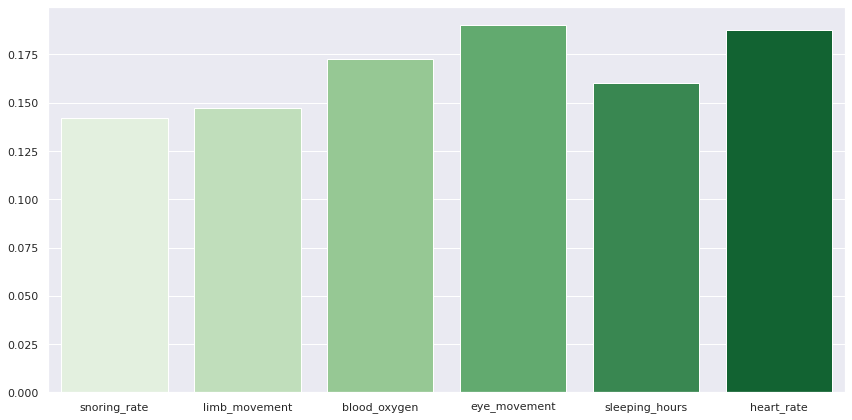

In [104]:
# Importancia de las variables
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(X_train.columns, model_best.feature_importances_, palette='Greens')
sns.set(rc={'axes.facecolor':'blue', 'figure.facecolor':'blue'})
fig.tight_layout()
plt.show()

## Conclusiones

Utilizando el algoritmo de random forest, obtenemos un mejor accuracy que haciendo uso de un DecisionTreeClassifier. También se observan mejores valores de Precision, Recall y F1 Score.
Asimismo, con la optimización mediante GridSearch, mejoran todos los indicadores.
La importancia de las variables es más equilibrada en este modelo, y está considerando todas.

#Elección del Modelo

Nos inclinamos por el Random Forest Mejorado, ya que tiene mejores indicadores de Accuracy que el Arbol de Decisión y está más equilibrada la importancia de las variables.

El modelo de Vecinos más cercanos nos parece que hace overfitting porque todos los indicadores dan 1.